# Notes 2023-01-03

## Pandas

### Series

In [1]:
import pandas as pd

In [2]:
s = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})

In [3]:
s

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
arr = s.values
arr

array([1, 2, 3, 4])

Selecting elements with slicing

In [5]:
arr[1: 2]

array([2])

In [6]:
s['b': 'c']

b    2
c    3
dtype: int64

*note that with string labels the upper limit is included in the selection*

Selecting elements with list input

In [7]:
s[['a', 'd']]

a    1
d    4
dtype: int64

In [8]:
s

a    1
b    2
c    3
d    4
dtype: int64

Filtering with logical expressions -> boolean arrays

In [9]:
s > 2

a    False
b    False
c     True
d     True
dtype: bool

In [10]:
s[[False, False, True, True]]

c    3
d    4
dtype: int64

In [11]:
s[s>2]

c    3
d    4
dtype: int64

Statistical information

In [12]:
s.mean()

2.5

In [13]:
s.describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64

Handling of missing data

In [14]:
s['a':'b'] 

a    1
b    2
dtype: int64

In [15]:
s['b': 'c']

b    2
c    3
dtype: int64

In [16]:
s['a':'b'] + s['b': 'c']

a    NaN
b    4.0
c    NaN
dtype: float64

summing of series objects is aligned on indices, if one index is missing in the other the result is undefined, or NaN (Not a Number)

you can filter out missing values with dropna

In [17]:
(s['a':'b'] + s['b': 'c']).dropna()

b    4.0
dtype: float64

### Dataframes

In [18]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}


In [19]:
df = pd.DataFrame(data)
df

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [20]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [21]:
df.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [22]:
df.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

In [23]:
df.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

In [24]:
df.set_index('country') # returns a modified dataframe but does not change the original

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [25]:
df #unchanged

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [26]:
df.set_index('country', inplace=True)  # Modify this and return nothing

In [27]:
df

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [28]:
type(df['area'])

pandas.core.series.Series

In [29]:
df['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [30]:
df['capital']

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

In [31]:
df.capital

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

In [32]:
df.capital['France']

'Paris'

In [33]:
df.loc['France', 'capital']

'Paris'

In [34]:
df.iloc[1, -1] # second row, last column

'Paris'

In [35]:
df.population / df.area * 10e6

country
Belgium           3703.703704
France             957.831577
Germany           2276.992018
Netherlands       4069.739440
United Kingdom    2650.927212
dtype: float64

In [36]:
df['density'] = df.population / df.area * 10e6

In [37]:
df

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,3703.703704
France,64.3,671308,Paris,957.831577
Germany,81.3,357050,Berlin,2276.992018
Netherlands,16.9,41526,Amsterdam,4069.739440
United Kingdom,64.9,244820,London,2650.927212


In [38]:
df.sort_values('density', ascending=False)

,population,area,capital,density
country,,,,
Netherlands,16.9,41526,Amsterdam,4069.739440
Belgium,11.3,30510,Brussels,3703.703704
United Kingdom,64.9,244820,London,2650.927212
Germany,81.3,357050,Berlin,2276.992018
France,64.3,671308,Paris,957.831577


In [39]:
df['population'] # series

country
Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
Name: population, dtype: float64

In [40]:
df[['population', 'area', 'density']] # dataframe

,population,area,density
country,,,
Belgium,11.3,30510,3703.703704
France,64.3,671308,957.831577
Germany,81.3,357050,2276.992018
Netherlands,16.9,41526,4069.739440
United Kingdom,64.9,244820,2650.927212


In [41]:
df[['population', 'area', 'density']] .mean()

population        47.74000
area          269042.80000
density         2731.83879
dtype: float64

In [42]:
normalized_df = df[['population', 'area', 'density']] / df[['population', 'area', 'density']] .mean()
normalized_df

,population,area,density
country,,,
Belgium,0.236699,0.113402,1.355755
France,1.346879,2.495172,0.350618
Germany,1.702974,1.327112,0.833502
Netherlands,0.354001,0.154347,1.489744
United Kingdom,1.359447,0.909967,0.970382


<AxesSubplot: xlabel='country'>

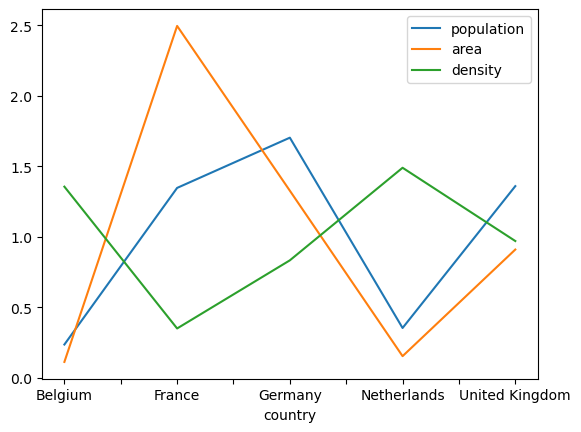

In [57]:
normalized_df.plot() # tries to use index data for x-axis

<AxesSubplot: xlabel='country'>

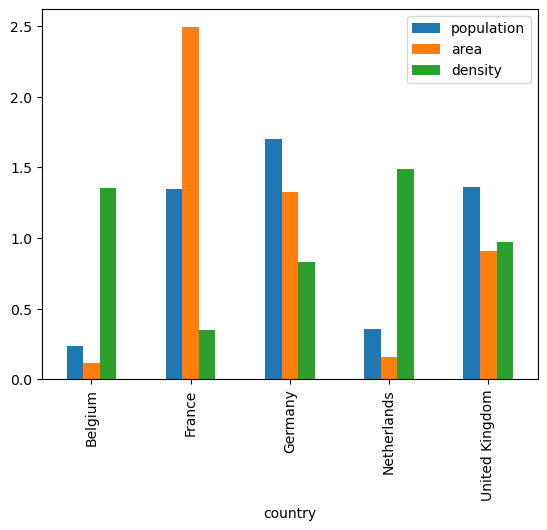

In [44]:
normalized_df.plot(kind='bar')

### Reading from file

The spreadsheet with data is from https://docs.google.com/spreadsheets/d/1VVw6O5ncoc2R-bBvu1Xc0PqylA6tKW2pyh5bDHhE_r8

First we download as csv and excel format respectively

The seperate tables are in

* person.csv
* survey.csv
* visited.csv
* site.csv

In [45]:
!ls *.csv

amazon.csv  apple.csv  person.csv  site.csv  survey.csv  tesla.csv  visited.csv


In [46]:
pd.read_csv('person.csv')

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [47]:
#!conda install openpyxl 
# needed to connect excel with pandas

In [48]:
pd.read_excel('survey-data.xlsx')

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [49]:
dfs = pd.read_excel('survey-data.xlsx', sheet_name=None)  # all sheets in a dictionary with sheet labels as keys
dfs

{'person':          id   personal    family
 0      dyer    William      Dyer
 1        pb      Frank   Pabodie
 2      lake   Anderson      Lake
 3       roe  Valentina   Roerich
 4  danforth      Frank  Danforth,
 'site':     name    lat    long
 0   DR-1 -49.85 -128.57
 1   DR-3 -47.15 -126.72
 2  MSK-4 -48.87 -123.40,
 'survey':     taken person quant  reading
 0     619   dyer   rad     9.82
 1     619   dyer   sal     0.13
 2     622   dyer   rad     7.80
 3     622   dyer   sal     0.09
 4     734     pb   rad     8.41
 5     734   lake   sal     0.05
 6     734     pb  temp   -21.50
 7     735     pb   rad     7.22
 8     735    NaN   sal     0.06
 9     735    NaN  temp   -26.00
 10    751     pb   rad     4.35
 11    751     pb  temp   -18.50
 12    751   lake   sal     0.10
 13    752   lake   rad     2.19
 14    752   lake   sal     0.09
 15    752   lake  temp   -16.00
 16    752    roe   sal    41.60
 17    837   lake   rad     1.46
 18    837   lake   sal     0.21
 19   

In [50]:
dfs['person']

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [51]:
dfs['site']

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


### Reading from URL

Using export import via csv

In [54]:
url = "https://docs.google.com/spreadsheets/d/1VVw6O5ncoc2R-bBvu1Xc0PqylA6tKW2pyh5bDHhE_r8"

In [55]:
pd.read_csv(f'{url}/export?format=csv')

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


Using export/import via excel

In [56]:
pd.read_excel(f'{url}/export?format=xlsx', sheet_name=None)

{'person':          id   personal    family
 0      dyer    William      Dyer
 1        pb      Frank   Pabodie
 2      lake   Anderson      Lake
 3       roe  Valentina   Roerich
 4  danforth      Frank  Danforth,
 'site':     name    lat    long
 0   DR-1 -49.85 -128.57
 1   DR-3 -47.15 -126.72
 2  MSK-4 -48.87 -123.40,
 'survey':     taken person quant  reading
 0     619   dyer   rad     9.82
 1     619   dyer   sal     0.13
 2     622   dyer   rad     7.80
 3     622   dyer   sal     0.09
 4     734     pb   rad     8.41
 5     734   lake   sal     0.05
 6     734     pb  temp   -21.50
 7     735     pb   rad     7.22
 8     735    NaN   sal     0.06
 9     735    NaN  temp   -26.00
 10    751     pb   rad     4.35
 11    751     pb  temp   -18.50
 12    751   lake   sal     0.10
 13    752   lake   rad     2.19
 14    752   lake   sal     0.09
 15    752   lake  temp   -16.00
 16    752    roe   sal    41.60
 17    837   lake   rad     1.46
 18    837   lake   sal     0.21
 19   